In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (0.0)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [40]:
# Categorical Data List
df.koi_disposition.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [6]:
# Split Data into 2 datasets: Candidate Data and Model Data
candidate_data = df[df['koi_disposition']=='CANDIDATE']
model_data = df[df['koi_disposition']!='CANDIDATE']
model_data.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [43]:
# Columns names for chosing features
list(df.columns)

['koi_disposition',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

# Explore DataSet and Select features (columns)

In [44]:
# Set features. This will also be used as your x values.
select_data = model_data[[ 'koi_disposition', 'koi_period', 'koi_steff',  'koi_time0bk', 'koi_depth',  'koi_duration', 'koi_teq', 'koi_insol', 'koi_slogg', 'koi_kepmag']]

In [45]:
select_data.head()

,koi_disposition,koi_period,koi_steff,koi_time0bk,koi_depth,koi_duration,koi_teq,koi_insol,koi_slogg,koi_kepmag
0,CONFIRMED,54.418383,5455,162.513840,874.8,4.50700,443,9.11,4.467,15.347
1,FALSE POSITIVE,19.899140,5853,175.850252,10829.0,1.78220,638,39.30,4.544,15.436
2,FALSE POSITIVE,1.736952,5805,170.307565,8079.2,2.40641,1395,891.96,4.564,15.597
3,CONFIRMED,2.525592,6031,171.595550,603.3,1.65450,1406,926.16,4.438,15.509
4,CONFIRMED,4.134435,6046,172.979370,686.0,3.14020,1160,427.65,4.486,15.714


In [46]:
X = select_data[['koi_period', 'koi_time0bk', 'koi_depth', 'koi_teq', 'koi_insol', 'koi_slogg', 'koi_duration', 'koi_kepmag']]
y = select_data['koi_disposition']

# Create a Train Test Split

Use `koi_disposition` for the y values

In [47]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [48]:
X_train.head()

,koi_period,koi_time0bk,koi_depth,koi_teq,koi_insol,koi_slogg,koi_duration,koi_kepmag
6742,235.206130,291.08930,642.0,230,0.66,4.648,6.989,15.917
3453,3.000119,132.90970,7.7,2566,10247.93,3.970,6.610,11.960
674,4.487588,133.36092,112.0,1305,684.07,4.227,2.874,13.446
5211,98.102098,170.33189,184.4,525,17.96,4.224,1.225,13.557
1786,44.616751,164.45238,239.7,693,54.56,4.220,7.831,13.791


In [49]:
y_test.head()

590          CONFIRMED
4592    FALSE POSITIVE
4126    FALSE POSITIVE
3028         CONFIRMED
87           CONFIRMED
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [50]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled

array([[2.90468929e-01, 1.26163151e-01, 4.11511073e-04, ...,
        8.80237230e-01, 5.79749671e-02, 8.10265230e-01],
       [3.33915291e-03, 9.16695829e-03, 0.00000000e+00, ...,
        7.50526114e-01, 5.47448553e-02, 4.52068435e-01],
       [5.17845293e-03, 9.50069931e-03, 6.76660964e-05, ...,
        7.99693897e-01, 2.29039643e-02, 5.86584593e-01],
       ...,
       [1.98086880e-03, 9.11070116e-03, 5.66457352e-02, ...,
        7.75779606e-01, 3.80786715e-02, 7.33049697e-01],
       [5.66936711e-02, 3.89955088e-02, 2.26822399e-01, ...,
        7.38664626e-01, 1.61125477e-01, 4.90721463e-01],
       [4.99154813e-03, 9.86571238e-03, 6.53954220e-05, ...,
        7.81710350e-01, 3.37320831e-02, 4.28894723e-01]])

# Decision Tree Model

In [51]:
# Create and score a decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8020735155513666

# Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Create a random forest classifier 
# Use not scaled data
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8567389255419415

# K-Nearest Neighbors Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.756
k: 3, Train/Test Score: 0.894/0.787
k: 5, Train/Test Score: 0.872/0.801
k: 7, Train/Test Score: 0.859/0.797
k: 9, Train/Test Score: 0.846/0.794
k: 11, Train/Test Score: 0.840/0.798
k: 13, Train/Test Score: 0.839/0.795
k: 15, Train/Test Score: 0.835/0.794
k: 17, Train/Test Score: 0.835/0.798
k: 19, Train/Test Score: 0.835/0.799


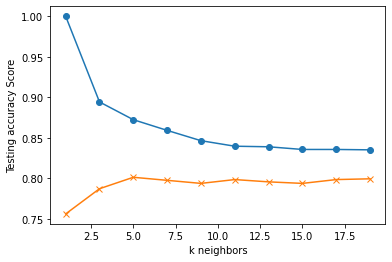

In [55]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [56]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.794


In [22]:
# Building Prediction
new_data = []
predicted_disposition = knn.predict(X_test)
print(y_test, predicted_disposition)

590          CONFIRMED
4592    FALSE POSITIVE
4126    FALSE POSITIVE
3028         CONFIRMED
87           CONFIRMED
             ...      
2301         CONFIRMED
4086         CONFIRMED
1632         CONFIRMED
811     FALSE POSITIVE
3999    FALSE POSITIVE
Name: koi_disposition, Length: 1061, dtype: object ['FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' ... 'FALSE POSITIVE'
 'FALSE POSITIVE' 'FALSE POSITIVE']


In [23]:
predicted_disposition[:20]

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

# Support Vector Machine  Model



#### Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [24]:
# Create the GridSearchCV model
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [27]:
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.709, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.710, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.726, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.710, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.726, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.709, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.710, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.726, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.710, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.726, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.8s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.7984882325488366


## Deep Learning Model

In [32]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=7))
model.add(Dense(units=1, activation='softmax'))

In [33]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [38]:
from tensorflow.keras.utils import to_categorical
# y_train_categorical = to_categorical(y_train)

In [39]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100


UnimplementedError:  Cast string to float is not supported
	 [[node categorical_crossentropy/Cast (defined at <ipython-input-34-a4f9d8bc9726>:2) ]] [Op:__inference_train_function_685]

Function call stack:
train_function


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'scv_model.sav'
joblib.dump(model, filename)